<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar100
(x_train,y_train) , (x_test,y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
y_test.shape

(10000, 1)

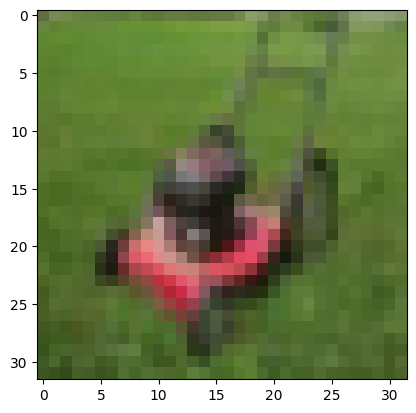

Hình [[[ 94 110  65]
  [120 137  85]
  [115 136  75]
  ...
  [144 162 119]
  [140 157 115]
  [134 151 107]]

 [[102 133  62]
  [ 97 129  52]
  [101 134  54]
  ...
  [128 151  92]
  [112 138  79]
  [103 130  70]]

 [[ 95 135  48]
  [ 98 138  49]
  [ 98 138  48]
  ...
  [115 141  71]
  [110 141  68]
  [106 139  66]]

 ...

 [[ 53  83  27]
  [ 67  98  36]
  [ 72 101  44]
  ...
  [ 77 100  44]
  [ 68  90  37]
  [ 70  94  39]]

 [[ 62  89  35]
  [ 76 104  47]
  [ 58  84  32]
  ...
  [ 84 108  51]
  [ 70  89  35]
  [ 85 105  53]]

 [[ 61  86  33]
  [ 57  81  29]
  [ 51  74  29]
  ...
  [ 75 102  45]
  [ 68  91  36]
  [ 76  99  45]]]


In [6]:
digit = x_train[500]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print('Hình', x_train[500])

<ipython-input-7-667916c02bdb>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


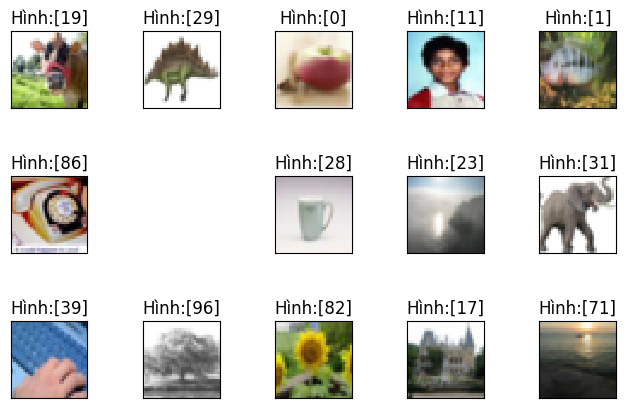

In [7]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation="none")
  plt.title("Hình:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(5000, activation="relu", input_shape = (32*32*3,)))
model.add(Dense(3000, activation= "relu"))
model.add(Dense(1000, activation= "relu"))
model.add(Dense(100, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_2 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_3 (Dense)             (None, 100)               100100    
                                                                 
Total params: 33,469,100
Trainable params: 33,469,100
Non-trainable params: 0
_________________________________________________________________


In [11]:
x = x_test
y = y_test

In [12]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size = 128)
test_loss, test_acc=model.evaluate(x_test, y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/30
391/391 [==============================] - 6s 12ms/step - loss: 0.5492 - accuracy: 0.9240
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.4946 - accuracy: 0.9314
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.5084 - accuracy: 0.9294
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.4954 - accuracy: 0.9317
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.5118 - accuracy: 0.9311
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.5034 - accuracy: 0.9321
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.5167 - accuracy: 0.9322
Epoch 8/30
391/391 [==============================] - 5s 12ms/step - loss: 0.4960 - accuracy: 0.9341
Epoch 9/30
391/391 [==============================] - 5s 12ms/step - loss: 0.4977 - accuracy: 0.9343
Epoch 10/30
391/391 [==============================] - 5s 12ms/step - loss: 0.4938 - accura

In [19]:
model.save('test1.h5')

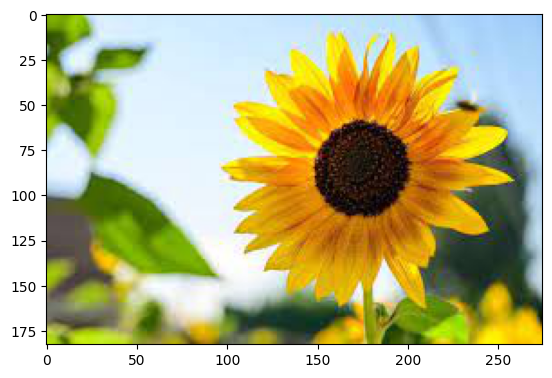

In [20]:
img = plt.imread('/content/drive/MyDrive/hoa hướng dương.jpg')
plt.imshow(img)

1/1 [==============================] - 0s 92ms/step


array([82])

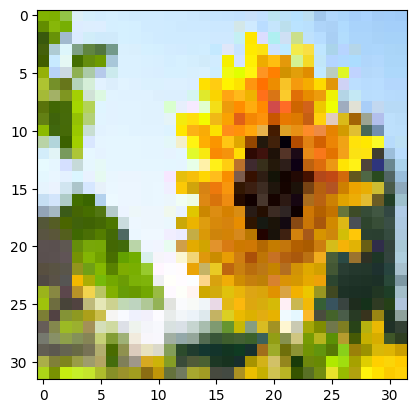

In [21]:
import numpy as np
from keras.utils import load_img, img_to_array
img=load_img('/content/drive/MyDrive/hoa hướng dương.jpg', target_size=(32,32)) #filename
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis =1)